# Import Library

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

# Preprocess For PCA

In [2]:
df = pd.read_csv('./dataset/gen/data.csv')

In [3]:
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process,tool_condition,error
0,202.0,4.0000,4.00,202.0,4.0,4.000000,0.180,0.0207,329,2.77,...,329,0.0,6.960000e-07,16.0,1,0,50,0,0,0
1,202.0,-6.8000,-346.00,202.0,-9.6,-354.000000,-10.900,0.1860,328,23.30,...,328,0.0,-5.270000e-07,16.0,1,4,50,1,0,0
2,200.0,-13.8000,-2.25,200.0,-13.9,3.999905,-8.590,0.1400,328,30.60,...,328,0.0,9.100000e-07,16.0,1,7,50,1,0,0
3,198.0,-14.0000,4.00,198.0,-13.9,3.999905,-6.110,0.1300,327,30.30,...,328,0.0,1.070000e-06,16.0,1,7,50,1,0,0
4,197.0,-13.9000,-14.80,196.0,-13.9,4.000095,-5.700,0.1140,328,30.50,...,328,0.0,1.960000e-06,16.0,1,7,50,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32043,179.0,3.5625,8.15,179.0,3.5,5.000000,-0.941,0.0215,328,1.79,...,328,0.0,-3.020000e-06,17.0,1,0,20,9,1,0
32044,178.5,3.5350,30.00,178.5,3.5,5.000000,-0.780,0.0202,328,1.07,...,328,0.0,0.000000e+00,17.0,1,0,20,9,1,0
32045,178.5,3.5475,17.50,178.5,3.5,5.000000,0.501,0.0190,328,0.99,...,328,0.0,0.000000e+00,17.0,1,0,20,9,1,0
32046,178.5,3.4475,11.25,178.5,3.5,5.000000,-0.298,0.0193,328,1.37,...,328,0.0,-7.980000e-06,17.0,1,0,20,9,1,0


In [4]:
y = df['error']
x = df.drop(['error'],axis=1)
col = df.columns
df = df.values

x = StandardScaler().fit_transform(df)

df = pd.DataFrame(x,columns=col)
df

,X_ActualPosition,X_ActualVelocity,X_ActualAcceleration,X_SetPosition,X_SetVelocity,X_SetAcceleration,X_CurrentFeedback,X_DCBusVoltage,X_OutputCurrent,X_OutputVoltage,...,S_OutputCurrent,S_OutputVoltage,S_OutputPower,S_SystemInertia,M_CURRENT_PROGRAM_NUMBER,M_sequence_number,M_CURRENT_FEEDRATE,Machining_Process,tool_condition,error
0,2.068862,0.001389,-0.004968,2.068880,0.000504,-0.006054,0.155522,-1.089294,1.410111,-0.613139,...,1.359536,-1.474388,-1.432799,-0.314140,-0.012383,-1.017953,1.578163,-1.937682,-0.965703,-0.644387
1,2.068862,-1.917016,-3.818476,2.068880,-2.413205,-4.977489,-2.463408,3.048703,0.740323,1.728996,...,1.133322,-1.474388,-1.432813,-0.314140,-0.012383,-0.926365,1.578163,-1.534304,-0.965703,-0.644387
2,1.960528,-3.160426,-0.073066,1.960550,-3.176364,-0.006055,-1.917403,1.897174,0.740323,2.561806,...,1.133322,-1.474388,-1.432796,-0.314140,-0.012383,-0.857674,1.578163,-1.534304,-0.965703,-0.644387
3,1.852195,-3.195952,-0.004968,1.852221,-3.176364,-0.006055,-1.331217,1.646841,0.070536,2.527581,...,1.133322,-1.474388,-1.432794,-0.314140,-0.012383,-0.857674,1.578163,-1.534304,-0.965703,-0.644387
4,1.798028,-3.178189,-0.209808,1.743891,-3.176364,-0.006053,-1.234307,1.246309,0.740323,2.550397,...,1.133322,-1.474388,-1.432784,-0.314140,-0.012383,-0.857674,1.578163,-1.534304,-0.965703,-0.644387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32043,0.823027,-0.076324,0.040249,0.823088,-0.088235,0.007833,-0.109444,-1.069267,0.740323,-0.724941,...,1.133322,-1.474388,-1.432843,0.826143,-0.012383,-1.017953,0.078709,1.692720,1.035515,-0.644387
32044,0.795944,-0.081209,0.278321,0.796006,-0.088235,0.007833,-0.071389,-1.101810,0.740323,-0.807081,...,1.133322,-1.474388,-1.432807,0.826143,-0.012383,-1.017953,0.078709,1.692720,1.035515,-0.644387
32045,0.795944,-0.078989,0.142125,0.796006,-0.088235,0.007833,0.231395,-1.131850,0.740323,-0.816207,...,1.133322,-1.474388,-1.432807,0.826143,-0.012383,-1.017953,0.078709,1.692720,1.035515,-0.644387
32046,0.795944,-0.096752,0.074026,0.796006,-0.088235,0.007833,0.042539,-1.124340,0.740323,-0.772856,...,1.133322,-1.474388,-1.432902,0.826143,-0.012383,-1.017953,0.078709,1.692720,1.035515,-0.644387


In [5]:
features =x.T  # X 데이터는 150 × 4 이라면,
               # feature 는 4 × 150 이다.

cov_mat = np.cov(features)
cov_mat

array([[ 1.0000312 , -0.04193167, -0.01985768, ..., -0.02454001,
        -0.05630746,  0.25142208],
       [-0.04193167,  1.0000312 ,  0.04463781, ...,  0.00805136,
         0.03611741, -0.0248216 ],
       [-0.01985768,  0.04463781,  1.0000312 , ..., -0.02549388,
         0.00825153,  0.01508939],
       ...,
       [-0.02454001,  0.00805136, -0.02549388, ...,  1.0000312 ,
         0.00231073,  0.00401919],
       [-0.05630746,  0.03611741,  0.00825153, ...,  0.00231073,
         1.0000312 ,  0.21923236],
       [ 0.25142208, -0.0248216 ,  0.01508939, ...,  0.00401919,
         0.21923236,  1.0000312 ]])

In [6]:
values, vectors = np.linalg.eig(cov_mat)

print('\nEigenvalues \n%s '% values[:])
print('\nEigenvectros \n%s'  %  vectors[:])


Eigenvalues 
[1.33136948e+01 4.64762274e+00 3.04051164e+00 2.16542668e+00
 1.98300356e+00 1.91341342e+00 1.84672825e+00 1.58945581e+00
 1.47673523e+00 1.34045548e+00 1.29859059e+00 1.24805362e+00
 1.13066010e+00 1.06611899e+00 9.96472303e-01 9.69800049e-01
 9.23488227e-01 6.22215664e-01 6.10079314e-01 5.75136674e-01
 5.19101394e-01 3.85164979e-01 3.46033636e-01 3.27067804e-01
 3.05248787e-01 2.12146087e-01 1.99714691e-01 1.82704531e-01
 1.62600467e-01 1.48186383e-01 1.29227679e-01 1.09355055e-01
 6.69563489e-02 4.17867604e-02 3.96166819e-02 3.38625748e-02
 1.86663439e-02 8.67422858e-03 6.11197444e-03 7.25250971e-04
 6.34233399e-04 1.06707319e-04 7.54789564e-05 3.13802600e-06
 4.90837476e-07 5.58476101e-07 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00] 

Eigenvectros 
[[-0.21844138  0.0309289  -0.07271316 ...  0.          0.
   0.        ]
 [ 0.01907902 -0.15148926 -0.44321129 ...  0.          0.
   0.        ]
 [ 0.00366161  0.00910077 -0.09878088 ...  0.          0.
  

In [7]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
explained_variances

[0.2894191160549869,
 0.10103212439831794,
 0.06609601664124164,
 0.04707302408466875,
 0.043107427987711236,
 0.041594646080358205,
 0.04014501370413085,
 0.03455230908957377,
 0.032101938143611015,
 0.02913942730711134,
 0.02822934924040246,
 0.02713075391266225,
 0.024578800404860535,
 0.023175776613624143,
 0.02166176543008764,
 0.021081951913982357,
 0.02007520459196464,
 0.013526005402966518,
 0.013262179950719318,
 0.012502581050213074,
 0.011284460783115407,
 0.008372890448957492,
 0.007522235613214816,
 0.007109947795761389,
 0.006635636144687956,
 0.004611727557281938,
 0.004341488246814287,
 0.003971713685947463,
 0.0035346824685852066,
 0.003221342586470739,
 0.0028092097156135723,
 0.0023772096275655906,
 0.0014555273839469106,
 0.0009083794896396263,
 0.0008612053415062725,
 0.000736119959999268,
 0.0004057774218624852,
 0.00018856430252017388,
 0.00013286486356708067,
 1.576583349100651e-05,
 1.3787252358897587e-05,
 2.3196519385599247e-06,
 1.6407956784665868e-06,
 6.82

In [8]:
a = 0
lst = []

for idx, var in enumerate(explained_variances):
    a += var
    print(idx, a)
    lst.append(a)

0 0.2894191160549869
1 0.3904512404533048
2 0.45654725709454647
3 0.5036202811792152
4 0.5467277091669265
5 0.5883223552472847
6 0.6284673689514155
7 0.6630196780409893
8 0.6951216161846003
9 0.7242610434917117
10 0.7524903927321142
11 0.7796211466447764
12 0.8041999470496369
13 0.8273757236632611
14 0.8490374890933488
15 0.8701194410073311
16 0.8901946455992957
17 0.9037206510022623
18 0.9169828309529816
19 0.9294854120031947
20 0.9407698727863101
21 0.9491427632352676
22 0.9566649988484824
23 0.9637749466442438
24 0.9704105827889318
25 0.9750223103462137
26 0.9793637985930279
27 0.9833355122789754
28 0.9868701947475607
29 0.9900915373340314
30 0.992900747049645
31 0.9952779566772106
32 0.9967334840611576
33 0.9976418635507972
34 0.9985030688923034
35 0.9992391888523027
36 0.9996449662741651
37 0.9998335305766852
38 0.9999663954402523
39 0.9999821612737434
40 0.9999959485261023
41 0.9999982681780408
42 0.9999999089737193
43 0.9999999771895473
44 0.9999999878595942
45 1.000000000000000

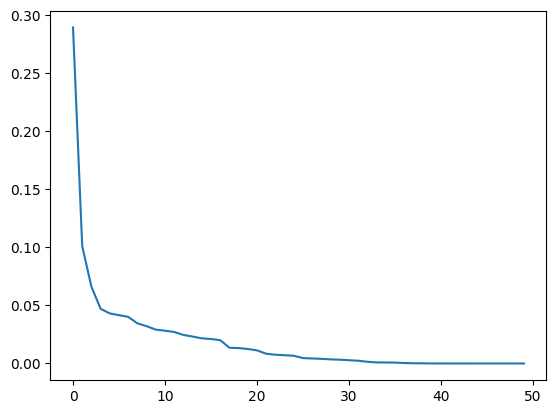

In [9]:
plt.plot(explained_variances)
plt.show()

In [17]:
compo = 2
pca = PCA(n_components=compo) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
pdf = pd.DataFrame(data=printcipalComponents,
                   columns = [f'pca{num+1}' for num in range(compo)])
pdf['error'] = y
pdf

,pca1,pca2,error
0,-6.930812,-0.466194,0
1,-4.873430,12.138271,0
2,-5.355472,13.139304,0
3,-4.939790,13.328300,0
4,-4.947578,13.813422,0
...,...,...,...
32043,-3.715826,-0.898622,0
32044,-3.811252,-0.996037,0
32045,-3.816930,-0.956759,0
32046,-3.687859,-0.828201,0


In [18]:
pca.explained_variance_ratio_

array([0.28941912, 0.10103212])

In [19]:
sum(pca.explained_variance_ratio_)

0.39045124043784585

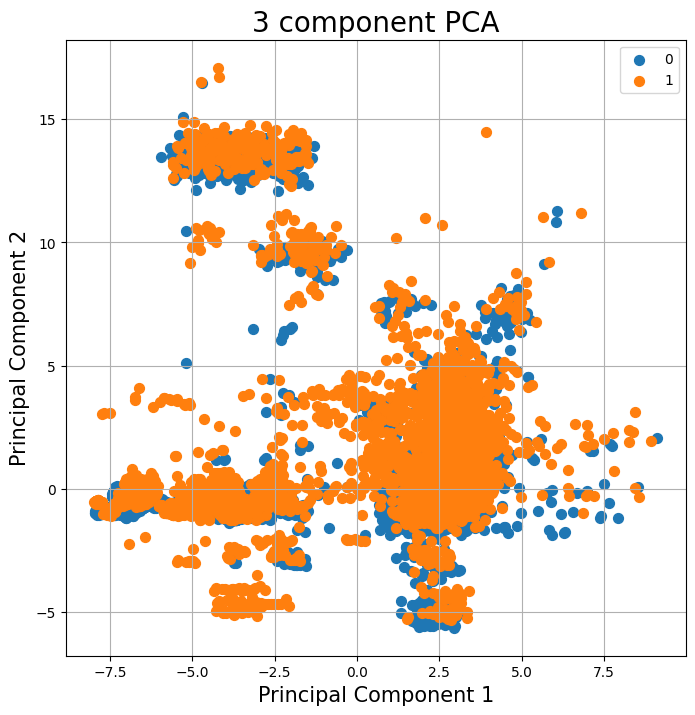

In [20]:
fig = plt.figure(figsize = (8, 8))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize=20)

targets = pdf['error'].unique()
for target in targets:
    indicesToKeep = (pdf['error'] == target)
    ax.scatter(pdf.loc[indicesToKeep, 'pca1']
               , pdf.loc[indicesToKeep, 'pca2']
#                , pdf.loc[indicesToKeep, 'pca3']
               , s = 50)
ax.legend(targets)
ax.grid()